<a href="https://colab.research.google.com/github/mauricionoris/ae/blob/master/pratica/atv05.1_MetodosMutacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Métodos de Mutação em Algoritmos Genéticos

# A mutação é um dos principais operadores de diversidade em algoritmos genéticos. Ela tem o papel de introduzir pequenas alterações aleatórias nos indivíduos, evitando a convergência prematura e ajudando a explorar novas regiões do espaço de busca. Abaixo estão cinco métodos diferentes de mutação, com exemplos em Python.

# 1. Mutação de Inversão
# Usada com representações de permutação (como no problema do caixeiro-viajante). Seleciona dois pontos e inverte a ordem dos genes nesse intervalo.

import random

def mutacao_inversao(individuo):
    a, b = sorted(random.sample(range(len(individuo)), 2))
    individuo[a:b] = individuo[a:b][::-1]
    return individuo

# 2. Mutação Gaussiana
# Indicada para representações reais. Adiciona ruído gaussiano a um ou mais genes.

import numpy as np

def mutacao_gaussiana(individuo, sigma=0.1):
    i = random.randrange(len(individuo))
    individuo[i] += np.random.normal(0, sigma)
    return individuo

# 3. Mutação de Troca (Swap Mutation)
# Seleciona aleatoriamente dois genes e troca suas posições. Muito usada em codificação de permutações.

def mutacao_troca(individuo):
    a, b = random.sample(range(len(individuo)), 2)
    individuo[a], individuo[b] = individuo[b], individuo[a]
    return individuo

# 4. Mutação Uniforme
# Cada gene tem uma pequena probabilidade de ser substituído por um novo valor aleatório dentro do domínio permitido.

def mutacao_uniforme(individuo, taxa=0.1, min_val=0, max_val=1):
    for i in range(len(individuo)):
        if random.random() < taxa:
            individuo[i] = random.uniform(min_val, max_val)
    return individuo

# 5. Mutação Não Uniforme
# Usada em algoritmos genéticos com controle de tempo. A magnitude da mutação diminui ao longo das gerações, permitindo uma busca mais refinada no final.

def mutacao_nao_uniforme(individuo, geracao, geracoes_max, min_val, max_val, b=5):
    for i in range(len(individuo)):
        if random.random() < 0.1:
            delta = (max_val - individuo[i]) * (1 - random.random() ** ((1 - geracao/geracoes_max) ** b))
            if random.random() < 0.5:
                individuo[i] -= delta
            else:
                individuo[i] += delta
    return individuo

# Esses métodos podem ser aplicados de forma adaptativa, dependendo do tipo de representação e do estágio da evolução.
# Em problemas com variáveis contínuas, mutações baseadas em distribuição (como a Gaussiana e a Não Uniforme) tendem a ser mais eficazes,
# enquanto para permutações, as mutações de Inversão e Troca são mais apropriadas.


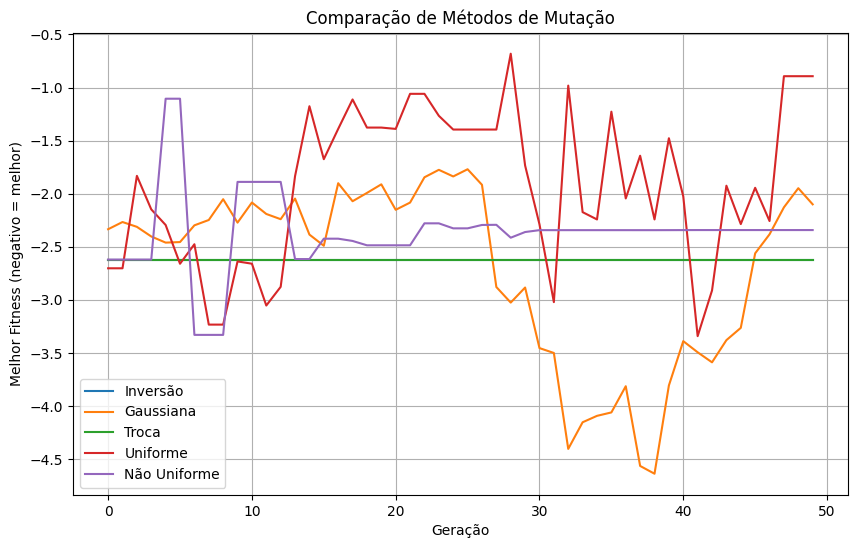

In [6]:
# --- Função de avaliação simples ---
# Vamos usar uma função de minimização: f(x) = soma(x^2)

import random
import matplotlib.pyplot as plt

def fitness(individuo):
  return -sum(np.square(individuo))


# --- População inicial ---
np.random.seed(42)
random.seed(42)


populacao_inicial = [list(np.random.uniform(-2, 2, 5)) for _ in range(30)]


# --- Experimento comparativo ---
# --- Experimento comparativo ---


def executar_experimento(mutacao_fn, label, **kwargs):
  historico = []
  populacao = [ind.copy() for ind in populacao_inicial]
  for g in range(50):
    nova_pop = []
    for ind in populacao:
      novo = ind.copy()
      if mutacao_fn == mutacao_nao_uniforme:
        novo = mutacao_fn(novo, g, 50, -2, 2)
      else:
        novo = mutacao_fn(novo, **kwargs)
      nova_pop.append(novo)
    melhor = max([fitness(i) for i in nova_pop])
    historico.append(melhor)
    populacao = nova_pop
  return historico


# Executar experimentos
exp_inversao = executar_experimento(mutacao_inversao, 'Inversão')
exp_gaussiana = executar_experimento(mutacao_gaussiana, 'Gaussiana', sigma=0.2)
exp_troca = executar_experimento(mutacao_troca, 'Troca')
exp_uniforme = executar_experimento(mutacao_uniforme, 'Uniforme', taxa=0.2, min_val=-2, max_val=2)
exp_nao_uniforme = executar_experimento(mutacao_nao_uniforme, 'Não Uniforme')


# --- Visualização dos resultados ---
plt.figure(figsize=(10,6))
plt.plot(exp_inversao, label='Inversão')
plt.plot(exp_gaussiana, label='Gaussiana')
plt.plot(exp_troca, label='Troca')
plt.plot(exp_uniforme, label='Uniforme')
plt.plot(exp_nao_uniforme, label='Não Uniforme')
plt.title('Comparação de Métodos de Mutação')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness (negativo = melhor)')
plt.legend()
plt.grid(True)
plt.show()


# --- Observações ---



# --- Exercícios de Análise ---


1. **Comparação de desempenho entre métodos:**
Observe o gráfico de evolução do fitness e identifique qual método de mutação apresentou maior estabilidade e qual proporcionou maior variação ao longo das gerações. Explique o que isso indica sobre a natureza exploratória e explotatória de cada operador.


2. **Influência dos parâmetros de mutação:**
Altere os valores dos parâmetros `sigma` (na mutação gaussiana) e `taxa` (na mutação uniforme) e repita o experimento. Analise como a mudança desses parâmetros afeta a convergência e o comportamento do algoritmo, discutindo o equilíbrio entre exploração e refinamento da busca.